In [1]:
import pandas as pd

# **PREDICT**

In [2]:
# from joblib import load

# KNN = load('D:\Garpit\Kerja\Kerja Beneran\Zona 11 DB LPO\Garpit Area\Aug 07 2025\Rate Prediction\SKW-35\knn_model_v.joblib')

In [3]:
# from joblib import load

# KNN = load(r"D:\Garpit\Kerja\Kerja Beneran\Zona 11 DB LPO\Garpit Area\Aug 22 2025\Rate Prediction\Dari Log dan Prod\xgboost_r.joblib")

In [4]:
from joblib import load

KNN = load(r"D:\Garpit\Kerja\Kerja Beneran\Zona 11 DB LPO\Garpit Area\Sept 4 2025\Dari Log dan Prod\Semua Param\knn_model_r.joblib")

In [5]:
df = pd.read_csv('SKW Final.csv')

print("DataFrame Head:")
display(df.head())

print("\nDataFrame Info:")
display(df.info())

DataFrame Head:


,Location,UWI,Reading Time,Average Amps (A) (Raw),Drive Frequency (Hz) (Raw),Intake Pressure (psi) (Raw),Discharge Pressure (psi) (Raw),Intake Temperature (F) (Raw),Motor Temperature (F) (Raw),Vibration (gravit) (Raw)
0,SKW-33,SKW-33,2025-03-03 17:17:37,NaN,0.0,NaN,1511.066311,NaN,NaN,NaN
1,SKW-33,SKW-33,2025-03-03 17:17:42,NaN,0.0,NaN,1511.066311,NaN,NaN,NaN
2,SKW-33,SKW-33,2025-03-03 17:18:16,0.0,NaN,NaN,1307.860608,NaN,NaN,NaN
3,SKW-33,SKW-33,2025-03-03 17:18:20,0.0,NaN,NaN,1307.860608,NaN,NaN,NaN
4,SKW-33,SKW-33,2025-03-03 17:25:03,NaN,NaN,0.0,2406.360305,NaN,NaN,NaN



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19484 entries, 0 to 19483
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location                        19484 non-null  object 
 1   UWI                             19484 non-null  object 
 2   Reading Time                    19484 non-null  object 
 3   Average Amps (A) (Raw)          19462 non-null  float64
 4   Drive Frequency (Hz) (Raw)      19461 non-null  float64
 5   Intake Pressure (psi) (Raw)     19457 non-null  float64
 6   Discharge Pressure (psi) (Raw)  19484 non-null  float64
 7   Intake Temperature (F) (Raw)    19457 non-null  float64
 8   Motor Temperature (F) (Raw)     19458 non-null  float64
 9   Vibration (gravit) (Raw)        19459 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.5+ MB


None

In [6]:
df.dropna(inplace=True)

In [7]:
df_clear = df.drop(df.columns[[0,1,2,6]], axis=1)

In [8]:
df_clear

,Average Amps (A) (Raw),Drive Frequency (Hz) (Raw),Intake Pressure (psi) (Raw),Intake Temperature (F) (Raw),Motor Temperature (F) (Raw),Vibration (gravit) (Raw)
12,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0
13,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0
14,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0
15,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0
16,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0
...,...,...,...,...,...,...
19478,0.0,0.0,2527.8,2.631000e+02,2.642000e+02,0.2
19479,0.0,0.0,2527.6,2.631000e+02,2.644000e+02,0.2
19480,0.0,0.0,2527.5,2.631000e+02,2.642000e+02,0.2
19481,0.0,0.0,2528.0,2.631000e+02,2.642000e+02,0.2


In [9]:
# # Buat salinan daftar nama kolom
# cols1 = df_clear.columns.tolist()

# cols1[0] = 'A'
# cols1[1] = 'IP'
# cols1[2] = 'IT'   
# cols1[3] = 'MT'   
# # cols1[4] = 'V'     

# # Terapkan kembali ke dataframe
# df_clear.columns = cols1

In [10]:
df_clear.head()

,Average Amps (A) (Raw),Drive Frequency (Hz) (Raw),Intake Pressure (psi) (Raw),Intake Temperature (F) (Raw),Motor Temperature (F) (Raw),Vibration (gravit) (Raw)
12,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0
13,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0
14,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0
15,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0
16,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0


In [11]:
result = KNN.predict(df_clear)

In [12]:
df_result = df_clear

In [13]:
df['Virtual Rate (BFPD) (Raw)'] = result

In [14]:
df.head()

,Location,UWI,Reading Time,Average Amps (A) (Raw),Drive Frequency (Hz) (Raw),Intake Pressure (psi) (Raw),Discharge Pressure (psi) (Raw),Intake Temperature (F) (Raw),Motor Temperature (F) (Raw),Vibration (gravit) (Raw),Virtual Rate (BFPD) (Raw)
12,SKW-33,SKW-33,2025-03-03 17:27:15,0.0,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0,0.0
13,SKW-33,SKW-33,2025-03-03 17:40:00,0.0,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0,0.0
14,SKW-33,SKW-33,2025-03-03 17:50:00,0.0,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0,0.0
15,SKW-33,SKW-33,2025-03-03 18:00:00,0.0,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0,0.0
16,SKW-33,SKW-33,2025-03-03 18:10:00,0.0,0.0,0.0,0.0,-4.000000e-09,-4.000000e-09,0.0,0.0


In [15]:
df['Virtual Rate (BFPD) (Raw)'] = df.apply(
    lambda row: 0 if (row['Average Amps (A) (Raw)'] == 0 and row['Drive Frequency (Hz) (Raw)'] == 0)
    else row['Virtual Rate (BFPD) (Raw)'],
    axis=1
)

In [16]:
df.to_csv('SKW_final_w_Pd.csv', index=False)

# **COMPARING**

## Compare 2

In [17]:
import os
# Ambil nilai unik dari kolom Location
loc = df['Location'].iloc[0]   # atau df['Location'].unique()[0]

# Buat path lengkap
base_path = r"D:\Garpit\Kerja\Kerja Beneran\Zona 11 DB LPO\Garpit Area\Sept 4 2025\Dari Log dan Prod"
filename = f"{loc}.csv"
file_path = os.path.join(base_path, filename)

# Baca CSV
df_raw = pd.read_csv(file_path)

In [18]:
df_raw.head()

,Reading Time,Average Amps (A) (Raw),Drive Frequency (Hz) (Raw),Intake Pressure (psi) (Raw),Discharge Pressure (psi) (Raw),Intake Temperature (F) (Raw),Motor Temperature (F) (Raw),Vibration (gravit) (Raw),Virtual Rate (BFPD) (Raw)
0,2025-03-03,0.000000,0.000000,0.000000,NaN,-4.000000e-09,-4.000000e-09,0.000000,NaN
1,2025-03-04,0.000000,0.000000,0.000000,NaN,-4.000000e-09,-4.000000e-09,0.000000,NaN
2,2025-03-05,0.000000,0.000000,0.000000,NaN,-4.000000e-09,-4.000000e-09,0.000000,NaN
3,2025-03-06,0.006977,0.468750,11.384496,NaN,1.349535e+01,1.350620e+01,0.010853,NaN
4,2025-03-07,15.710660,33.683206,2349.953807,NaN,2.491921e+02,2.696175e+02,0.198985,0.0


In [19]:
df_raw = df_raw.drop(df_raw.columns[[1,2,3,4,5,6,7]], axis=1)

In [20]:
df_test = df_raw

In [21]:
cols = df_test.columns.tolist()

# Hitung jumlah kolom NaN yang ditemukan
nan_count = 0

# Buat list baru dengan nama kolom yang diperbarui
new_cols = []

for col in cols:
    if pd.isna(col):
        nan_count += 1
        if nan_count == 1:
            new_cols.append('Date')
        elif nan_count == 2:
            new_cols.append('R')
        else:
            new_cols.append(col)  # biarkan tetap NaN kalau lebih dari dua
    else:
        new_cols.append(col)

# Ganti nama kolom di DataFrame
df_test.columns = new_cols

In [22]:
# Buat salinan daftar nama kolom
cols = df_test.columns.tolist()

cols[1] = 'R'

# Terapkan kembali ke dataframe
df_test.columns = cols

In [23]:
df_test = df_test[['Reading Time','R']]
df_test = df_test.dropna()

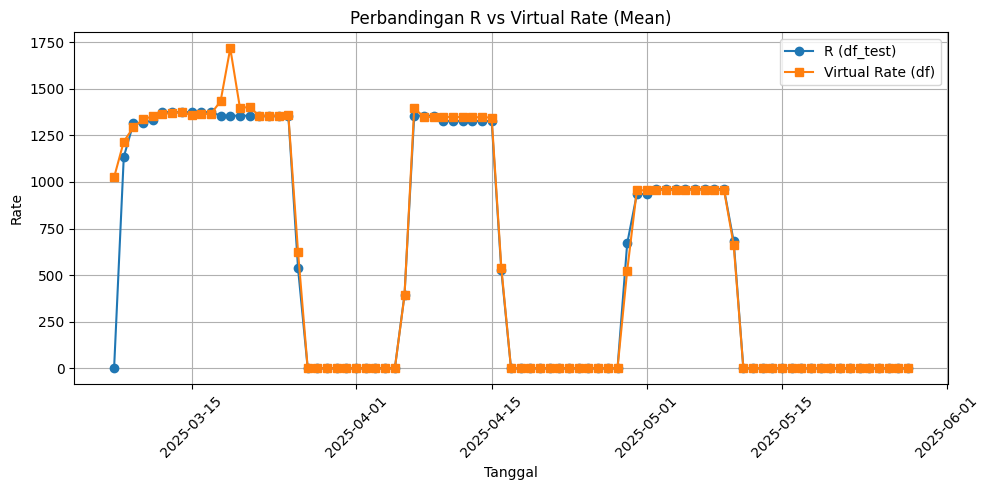

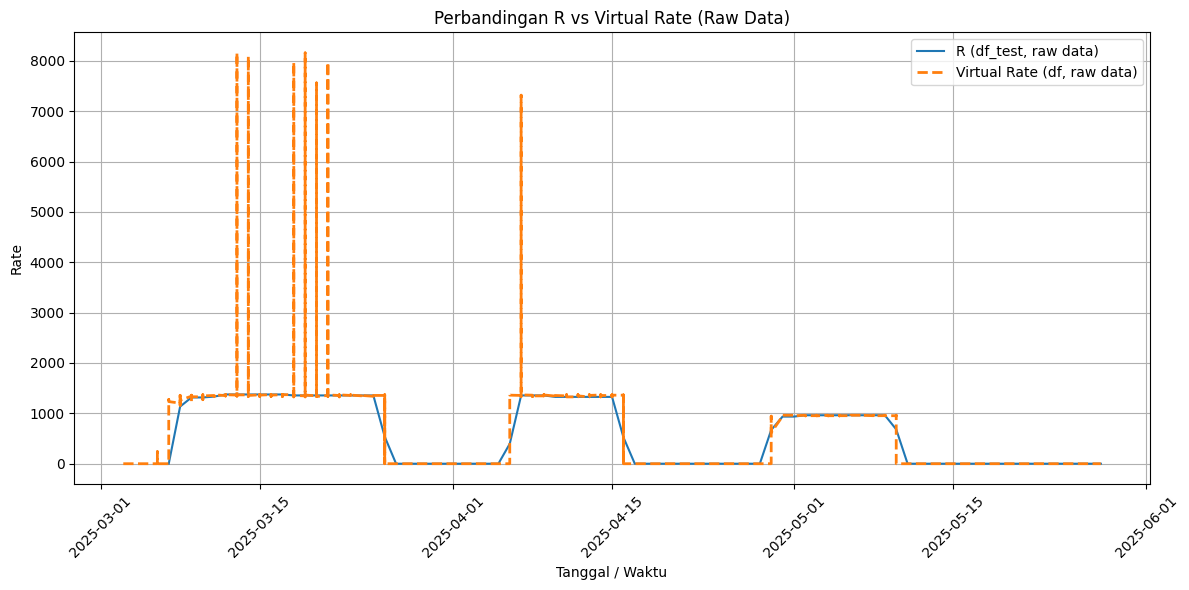

In [24]:
import matplotlib.pyplot as plt

# Pastikan datetime
df_test['Reading Time'] = pd.to_datetime(df_test['Reading Time'])
df['Reading Time'] = pd.to_datetime(df['Reading Time'])

# Ambil tanggal saja
df['Reading Time'] = df['Reading Time'].dt.date
df_test['Reading Time'] = df_test['Reading Time'].dt.date

# Hitung rata-rata Virtual Rate per tanggal
df_daily = df.groupby('Reading Time', as_index=False)['Virtual Rate (BFPD) (Raw)'].mean()

# Merge
merged = pd.merge(df_test, df_daily, on='Reading Time', how='inner')

# Pastikan semua jadi array 1D
dates = pd.to_datetime(merged['Reading Time']).to_numpy()
r_values = merged['R'].astype(float).to_numpy()
vr_values = merged['Virtual Rate (BFPD) (Raw)'].astype(float).to_numpy()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(dates, r_values, marker='o', label='R (df_test)')
plt.plot(dates, vr_values, marker='s', label='Virtual Rate (df)')

plt.title('Perbandingan R vs Virtual Rate (Mean)')
plt.xlabel('Tanggal')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Pastikan datetime
df_test['Reading Time'] = pd.to_datetime(df_test['Reading Time'])
df['Reading Time'] = pd.to_datetime(df['Reading Time'])

# Siapkan array df_test
dates_test = df_test['Reading Time'].to_numpy()
r_values = df_test['R'].astype(float).to_numpy()

# Siapkan array df
dates_df = df['Reading Time'].to_numpy()
vr_values = df['Virtual Rate (BFPD) (Raw)'].astype(float).to_numpy()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates_test, r_values, linestyle='-', label='R (df_test, raw data)')
plt.plot(dates_df, vr_values, linestyle='--', label='Virtual Rate (df, raw data)', linewidth=2)

plt.title('Perbandingan R vs Virtual Rate (Raw Data)')
plt.xlabel('Tanggal / Waktu')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()